In [28]:
Pkg.add("ForwardDiff")

   Resolving package versions...
   Installed DiffResults ────────── v1.1.0
   Installed CommonSubexpressions ─ v0.3.1
   Installed DiffRules ──────────── v1.15.1
   Installed ForwardDiff ────────── v1.3.2
    Updating `C:\Users\103720osbu\.julia\environments\v1.12\Project.toml`
  [f6369f11] + ForwardDiff v1.3.2
    Updating `C:\Users\103720osbu\.julia\environments\v1.12\Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.1
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [f6369f11] + ForwardDiff v1.3.2
Precompiling packages...
   2428.6 ms  ✓ CommonSubexpressions
   1359.2 ms  ✓ DiffRules
   1977.4 ms  ✓ DiffResults
   4496.6 ms  ✓ ForwardDiff
   1758.7 ms  ✓ Roots → RootsForwardDiffExt
   1912.7 ms  ✓ ForwardDiff → ForwardDiffStaticArraysExt
   3056.3 ms  ✓ Interpolations → InterpolationsForwardDiffExt
   4566.4 ms  ✓ DifferentiationInterface → DifferentiationInterfaceForwardDiffExt
  8 dependencies successfully precompiled in 14 seconds. 300 already precompil

In [74]:
using Pkg, SpecialFunctions, ForwardDiff, Plots

In [ ]:
#Taylor series, with handing primes

function taylor_series(f, fp, fpp, x0, x)
    return f(x0) + fp(x0)*(x-x0) + (fpp(x0)/(factorial(2))) * (x-x0)^2
end

taylor_series (generic function with 1 method)

In [45]:

function Taylor_series2(f,x0,x)
    f0 = f(x0)
    fp = ForwardDiff.derivative(f, x0)
    fpp = ForwardDiff.derivative(x -> ForwardDiff.derivative(f, x), x0)

    return f0 + fp * (x - x0) + (fpp/2) * ((x - x0)^2)
end

Taylor_series2 (generic function with 1 method)

In [ ]:
f(x) = x^2-2
Taylor_series2(f,1,2)

2.0

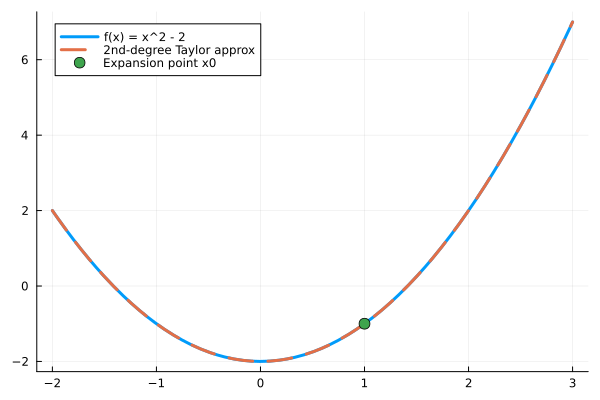

In [57]:

x0 = 1
plot(f, -2, 3, label="f(x) = x^2 - 2", linewidth=3)

plot!(x -> Taylor_series2(f, x0, x),
      -2, 3,
      label="2nd-degree Taylor approx",
      linestyle=:dash,
      linewidth=3)

scatter!([x0], [f(x0)], label="Expansion point x0", markersize=6)

In [70]:

f(x) = log(x)
true_fp(x) = 1/x0

function der(f, x0, h)
    return (f(x0 + h) + f(x0 - h)) / 2*h
end


der (generic function with 1 method)

In [76]:

hs = 10 .^ range(-1, -8, length = 50)
x0 = 1


fp_approx = [der(f,x0,h) for h in hs]
erors = abs.(fp_approx .- true_fp(x0))


50-element Vector{Float64}:
 1.000502516792675
 1.000186864033616
 1.0000695681315643
 1.000025915382222
 1.0000096569640506
 1.0000035990992058
 1.0000013414774012
 1.0000005000250016
 1.000000186384513
 1.0000000694757067
 1.0000000258975532
 1.0000000096535233
 1.000000003598435
 ⋮
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

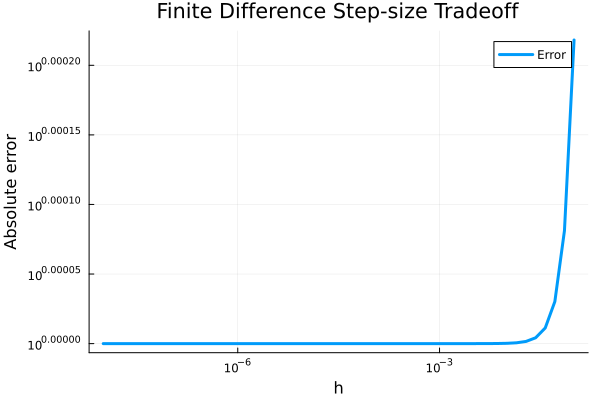

In [81]:
using Plots

plot(hs, erors,
     xscale=:log10,
     yscale=:log10,
     linewidth=3,
     label="Error")

xlabel!("h")
ylabel!("Absolute error")
title!("Finite Difference Step-size Tradeoff")


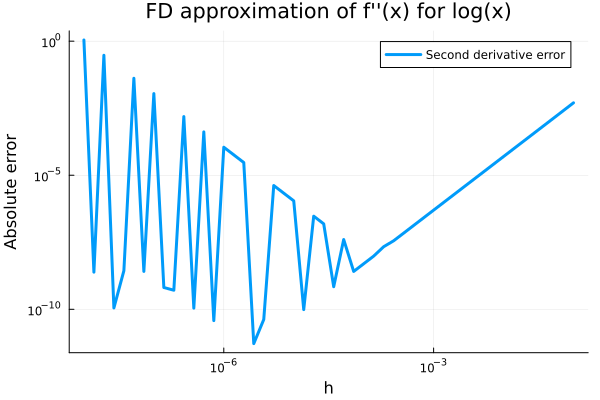

In [91]:
function fpp_approx(f, x0, h)
    return (f(x0 + h) - 2 * f(x0) + f(x0 - h)) / h^2
end

double = [fpp_approx(f, x0, h) for h in hs]
true_double = -1/(x0^2)
error = abs.(double .- true_double)

plot(hs, error,
     xscale=:log10,
     yscale=:log10,
     linewidth=3,
     label="Second derivative error")

xlabel!("h")
ylabel!("Absolute error")
title!("FD approximation of f''(x) for log(x)")

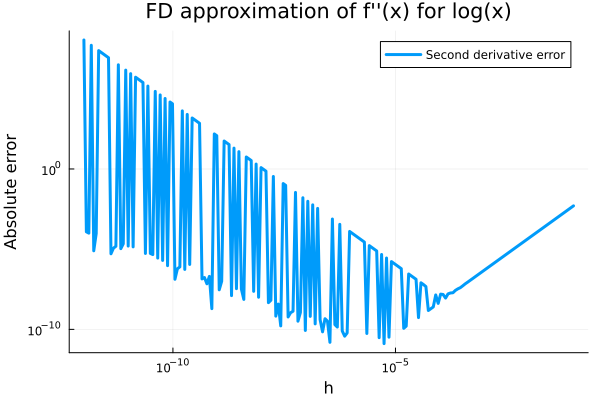

In [94]:
using Plots

f(x) = log(x)

function fpp_approx(f, x0, h)
    return (f(x0 + h) - 2*f(x0) + f(x0 - h)) / h^2
end

x0 = 1.0
hs = 10 .^ range(-1, -12, length=200)

double = [fpp_approx(f, x0, h) for h in hs]

true_double = -1/(x0^2)

error = abs.(double .- true_double)

plot(hs, error,
     xscale=:log10,
     yscale=:log10,
     linewidth=3,
     label="Second derivative error")

xlabel!("h")
ylabel!("Absolute error")
title!("FD approximation of f''(x) for log(x)")


Expansion point x0 = 1.0
True f''(x0)       = -1.0
Best h             = 5.542664520663107e-6
Minimum error      = 1.2895240431021193e-11
Rule-of-thumb h2nd ≈ 0.0001220703125


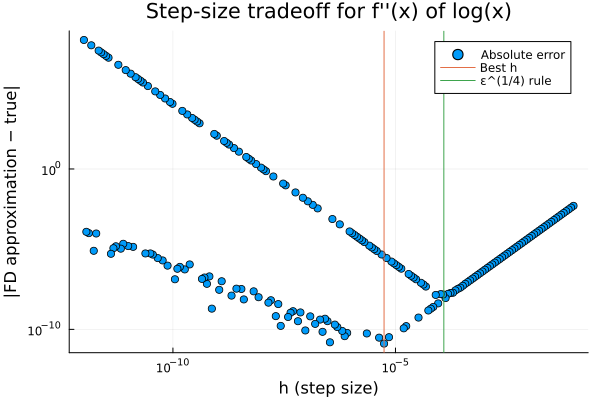

In [101]:
using Plots

# ------------------------------------------------------------
# Function to test
# ------------------------------------------------------------
f(x) = log(x)

# True second derivative of log(x):
# f''(x) = -1/x^2
true_fpp(x) = -1 / x^2


# ------------------------------------------------------------
# Centered finite difference approximation of f''(x)
# ------------------------------------------------------------
function fpp_approx(f, x0, h)
    return (f(x0 + h) - 2*f(x0) + f(x0 - h)) / h^2
end


# ------------------------------------------------------------
# Expansion point
# ------------------------------------------------------------
x0 = 1.0


# ------------------------------------------------------------
# Step-size grid for plotting (many h values)
# ------------------------------------------------------------
hs = 10 .^ range(-1, -12, length=200)


# ------------------------------------------------------------
# Compute FD approximations
# ------------------------------------------------------------
approx_vals = [fpp_approx(f, x0, h) for h in hs]


# ------------------------------------------------------------
# Compute absolute errors
# ------------------------------------------------------------
true_val = true_fpp(x0)
errors = abs.(approx_vals .- true_val)


# ------------------------------------------------------------
# Find best h (minimum error)
# ------------------------------------------------------------
best_index = argmin(errors)
best_h = hs[best_index]

println("=======================================")
println("Expansion point x0 = ", x0)
println("True f''(x0)       = ", true_val)
println("Best h             = ", best_h)
println("Minimum error      = ", errors[best_index])
println("=======================================")


# ------------------------------------------------------------
# Rule-of-thumb step size: ε^(1/4)
# ------------------------------------------------------------
ε = eps(Float64)
h2nd = ε^(1/4) * max(abs(x0), 1)

println("Rule-of-thumb h2nd ≈ ", h2nd)


# ------------------------------------------------------------
# Plot error vs h (log-log)
# ------------------------------------------------------------
scatter(hs, errors,
        xscale = :log10,
        yscale = :log10,
        label  = "Absolute error",
        markersize = 4)

# Mark best h and rule-of-thumb h
vline!([best_h], label="Best h")
vline!([h2nd], label="ε^(1/4) rule")

xlabel!("h (step size)")
ylabel!("|FD approximation − true|")
title!("Step-size tradeoff for f''(x) of log(x)")



In [99]:
typeof(hs)

Float64